<a href="https://colab.research.google.com/github/AriadnaVazquez/Metodos-Numericos-I/blob/main/Polinomio%20interpolante%20de%20Newton_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# Función para calcular las diferencias divididas
def diferencias_divididas(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y  # La primera columna es 'y'

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0]  # Devolver solo la primera fila (coeficientes del polinomio)

In [3]:
# Función para construir el polinomio de Newton usando los coeficientes de diferencias divididas
def construir_polinomio_newton(coef, x_data):
    n = len(coef)
    x = sp.Symbol('x')
    polinomio = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_data[j])
        polinomio += term
    return sp.expand(polinomio)

In [4]:
# Datos de la tabla de ejemplo
x = np.array([0, 1, 2, 3, 4, 5])  # Valores de x
y = np.array([-5, 1, 9, 25, 55, 105])  # Valores de F(x)

In [5]:
# Calculamos los coeficientes del polinomio interpolante de Newton
coef = diferencias_divididas(x, y)

In [6]:
# Construimos el polinomio en forma simbólica
polinomio_simbolico = construir_polinomio_newton(coef, x)
print("Polinomio interpolante de Newton:")
sp.pprint(polinomio_simbolico)

Polinomio interpolante de Newton:
     3        2              
1.0⋅x  - 2.0⋅x  + 7.0⋅x - 5.0


In [7]:
# Graficamos el polinomio y los puntos originales
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [polinomio_simbolico.evalf(subs={'x': xi}) for xi in x_plot]

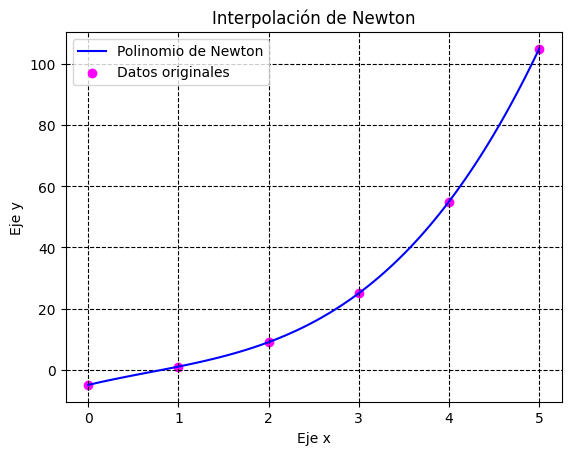

In [8]:
plt.plot(x_plot, y_plot, label="Polinomio de Newton", color="blue")
plt.scatter(x, y, color="magenta", marker='o', label="Datos originales")
plt.title("Interpolación de Newton")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.legend()
plt.grid(color="black", linestyle='--')
plt.show()